#**Artificial Intelligence**

#**School of Mechanical Engineering-Tehran University-2022**


#**Dear students**
#**G day**
#**Resnet50, MobileNetV1, MobileNetV2, EfficientV1, and Yolov3 are elucidated in this notebook.**
#**[1]. Resnet50 dataset is in the [mp_dataset] folder.**

#**[2]. MobileNets images are in the [MobileNet-Images] folder.**

#**[3]. EfficientNetV1 dataset is in the [EFFdataset] folder. [EFFdataset] contains the weights of Yolov3. You only need to upload the zip file in the[Yolo-dataset], then the following code will unzip the file and put the weights in the YL folder.[yolov3.cfg] is in the YL folder.**

#**with ZipFile('drive/MyDrive/Yolo-dataset/yolov3.zip','r') as zipObj:** 

#**zipObj.extractall('drive/MyDrive/YL')**


#**[4]. Images for ResNet50 and EfficientNetV1 are in the [ResNet-EfficientNet-Images] folder. [One video] is also in the folder for [ResNet50].**

#**[5]. For Yolov3, images and yolov3.cfg are in the [YL] folder.References are provided at the end of this notebook.**



#**Cheers,**
#**Affiliated Research Professor Mohammad Khoshnevisan**


# **Part I** 




#**Residual Network-Resnet50**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


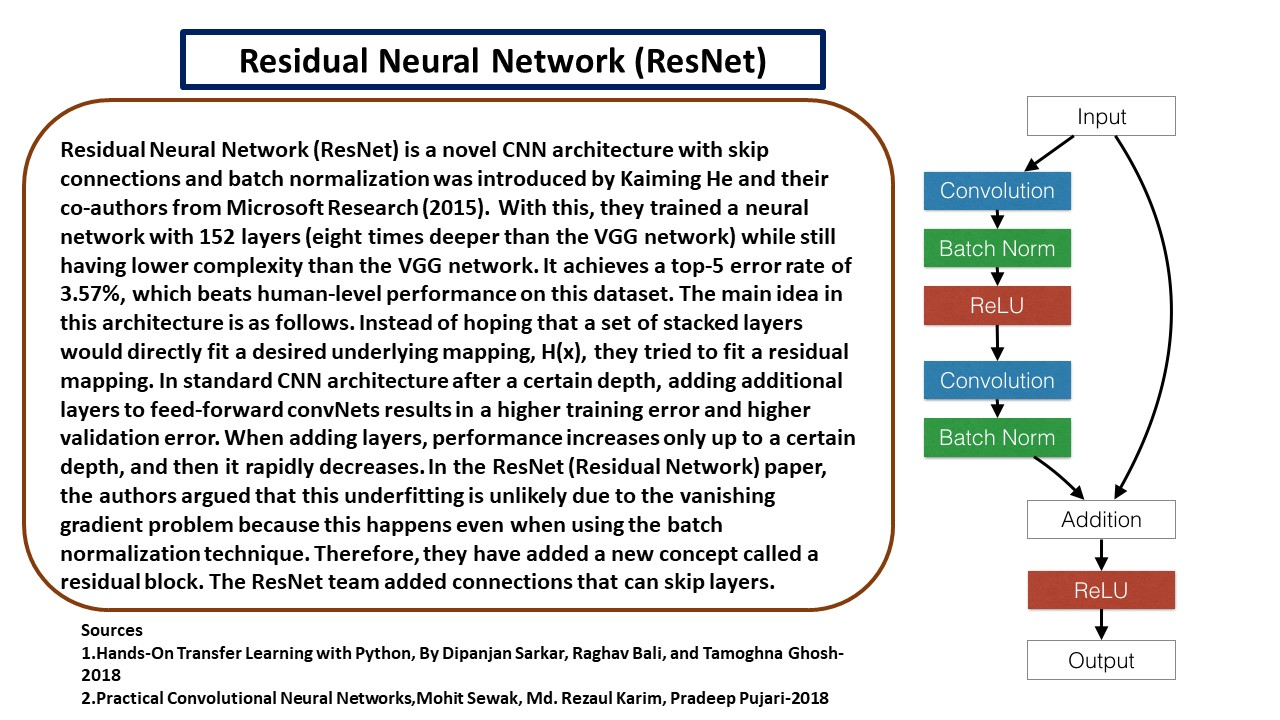

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/Residual Neural Network (ResNet)-T1.jpg', width=1000,height=1000)


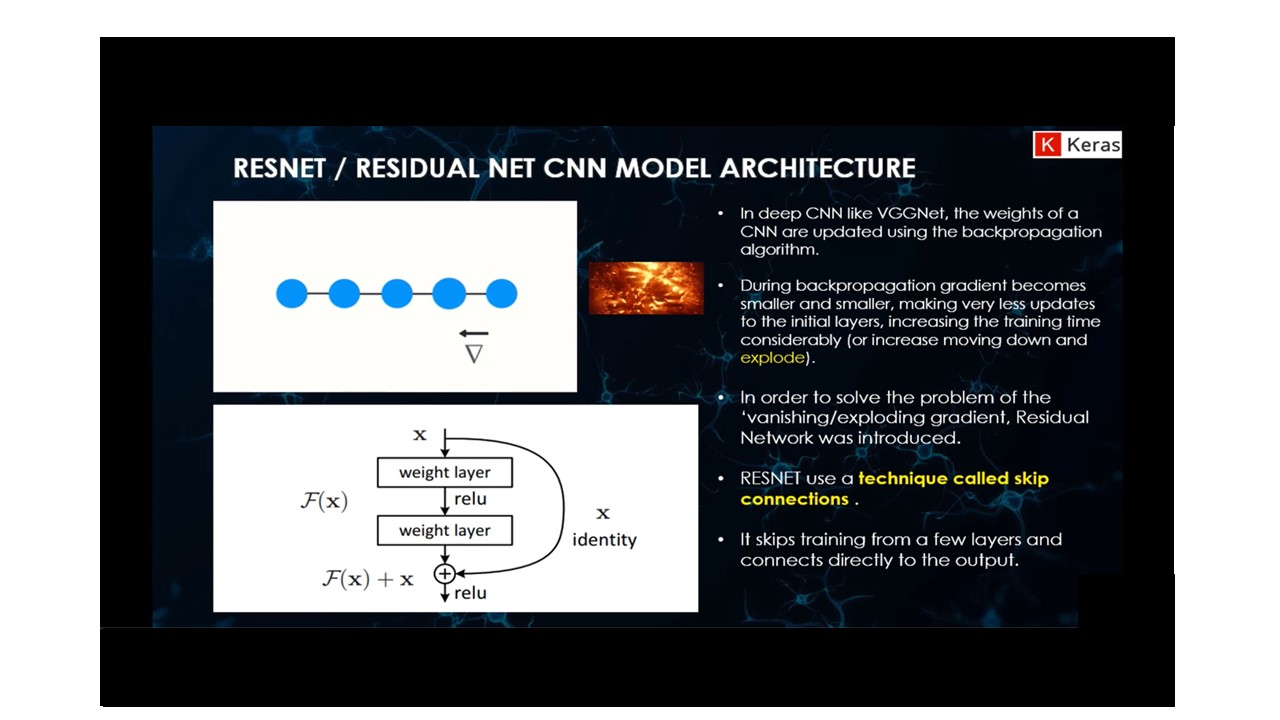

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/ResNet-1.jpg', width=900,height=900)


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path = "/content/drive/MyDrive/ResNet-EfficientNet-Images/Resnet-1.mp4"


compressed_path = "/content/drive/MyDrive/ResNet-EfficientNet-Images/Resnet-1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")


mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=800 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

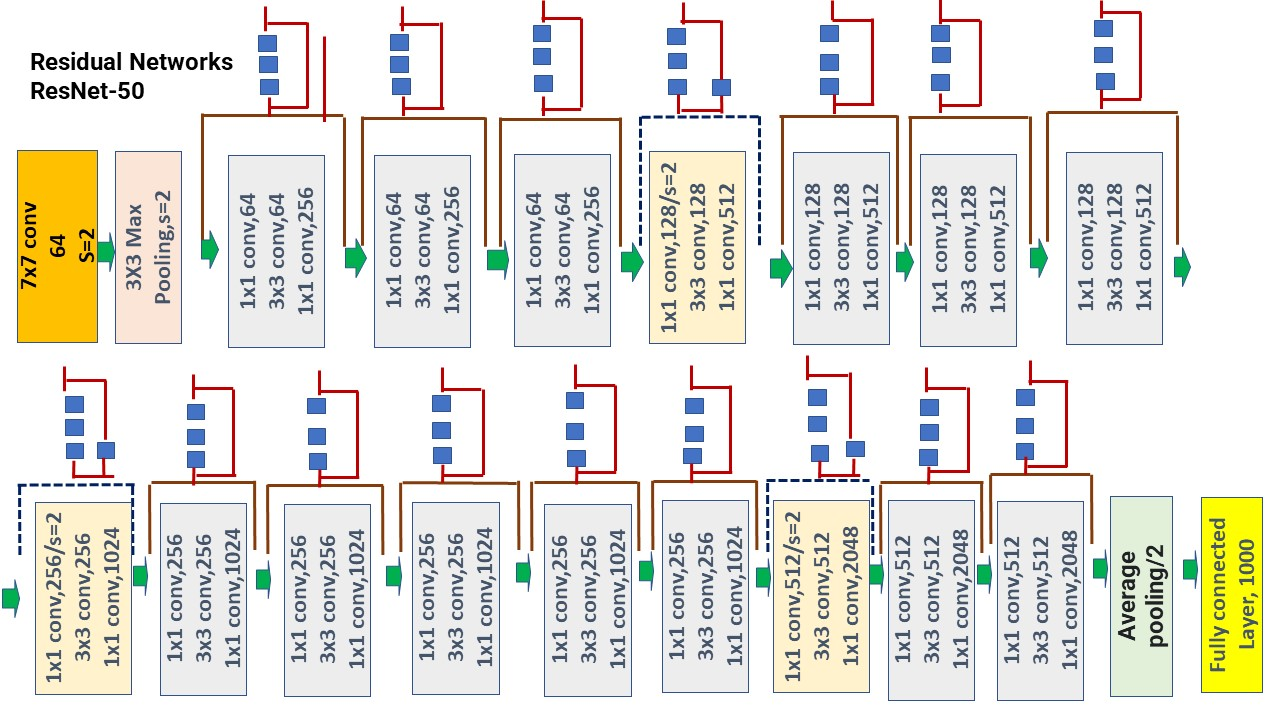

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/ResNet-50-1.jpg', width=1000,height=1000)

 # **1. Import libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
from keras.initializers import glorot_uniform
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

# **2. This dataset below has four types of mechanical components [nut, washer, bolt, and locating pin].**

In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/mp_dataset')


mechanical_types = os.listdir('/content/drive/MyDrive/mp_dataset')
print (mechanical_types)  

print("Types of mechanical found: ", len(dataset_path))

['nut', 'washer', 'bolt', 'locatingpin']
Types of mechanical found:  4


#**3.We obtain all the file names in the first for loop, and in the second loo, we add them to the empty list of mechanicals.**

In [ ]:
mechanicals = []

for item in mechanical_types:
 
 all_types = os.listdir('/content/drive/MyDrive/mp_dataset' + '/' +item)
 

 
 for part in all_types:
    mechanicals.append((item, str('/content/drive/MyDrive/mp_dataset' + '/' +item) + '/' + part))
    
mechanicals


[('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M12_1_20.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M12_1_10.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M45_1_5L_19.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M25_1_5_10.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M14_1_5_20.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M20_1_5_4.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M25_1_5_19.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M12_1_9.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M14_1_10.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M20_1_5_10.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M25_1_5_20.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M10_1_19.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M14_1_14.png'),
 ('nut', '/content/drive/MyDrive/mp_dataset/nut/AKM_M14_1_4.png'),
 ('nut', '/content/drive/MyDrive/mp_

#**4.We construct our DataFrame.**

In [ ]:
mechanicals_df = pd.DataFrame(data=mechanicals, columns=['mechanical type', 'image'])
print(mechanicals_df.head())
print(mechanicals_df.tail())

  mechanical type                                              image
0             nut  /content/drive/MyDrive/mp_dataset/nut/AKM_M12_...
1             nut  /content/drive/MyDrive/mp_dataset/nut/AKM_M12_...
2             nut  /content/drive/MyDrive/mp_dataset/nut/AKM_M45_...
3             nut  /content/drive/MyDrive/mp_dataset/nut/AKM_M25_...
4             nut  /content/drive/MyDrive/mp_dataset/nut/AKM_M14_...
    mechanical type                                              image
221     locatingpin  /content/drive/MyDrive/mp_dataset/locatingpin/...
222     locatingpin  /content/drive/MyDrive/mp_dataset/locatingpin/...
223     locatingpin  /content/drive/MyDrive/mp_dataset/locatingpin/...
224     locatingpin  /content/drive/MyDrive/mp_dataset/locatingpin/...
225     locatingpin  /content/drive/MyDrive/mp_dataset/locatingpin/...


# **5.We check our observations in each class.** 

In [ ]:

print("Total number of mechanicals in the dataset: ", len(mechanicals_df))

mechanical_count = mechanicals_df['mechanical type'].value_counts()

print("mechanicals in each category: ")
print(mechanical_count)



Total number of mechanicals in the dataset:  226
mechanicals in each category: 
bolt           119
nut             55
washer          37
locatingpin     15
Name: mechanical type, dtype: int64


#**6. We loop over all the four folders and obtain the name of all the images. Then we resize our images and append the images to the images=[] list and labels to the labels [] list.** 

In [ ]:

import cv2
path = '/content/drive/MyDrive/mp_dataset/'


im_size = 64

images = []
labels = []

for i in mechanical_types:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  
        
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)
labels    

['nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'nut',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'washer',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',
 'bolt',


#**7.We transform the image into a numpy array.** 

In [ ]:

images = np.array(images)
images.shape   

(226, 64, 64, 3)

#**8.We perform scaling on our images.** 

In [ ]:
images = images.astype('float32') / 255.0

#**9. We perform LabelEncoding and OneHotencoding.**

In [ ]:

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=mechanicals_df['mechanical type'].values


y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)


y=y.reshape(-1,1)
onehotencoder=OneHotEncoder(categories='auto', sparse=False)

Y= onehotencoder.fit_transform(y)
Y.shape  

(226, 4)

# **10.We do train-test-split**

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.20, random_state=42)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(180, 64, 64, 3)
(180, 4)
(46, 64, 64, 3)
(46, 4)


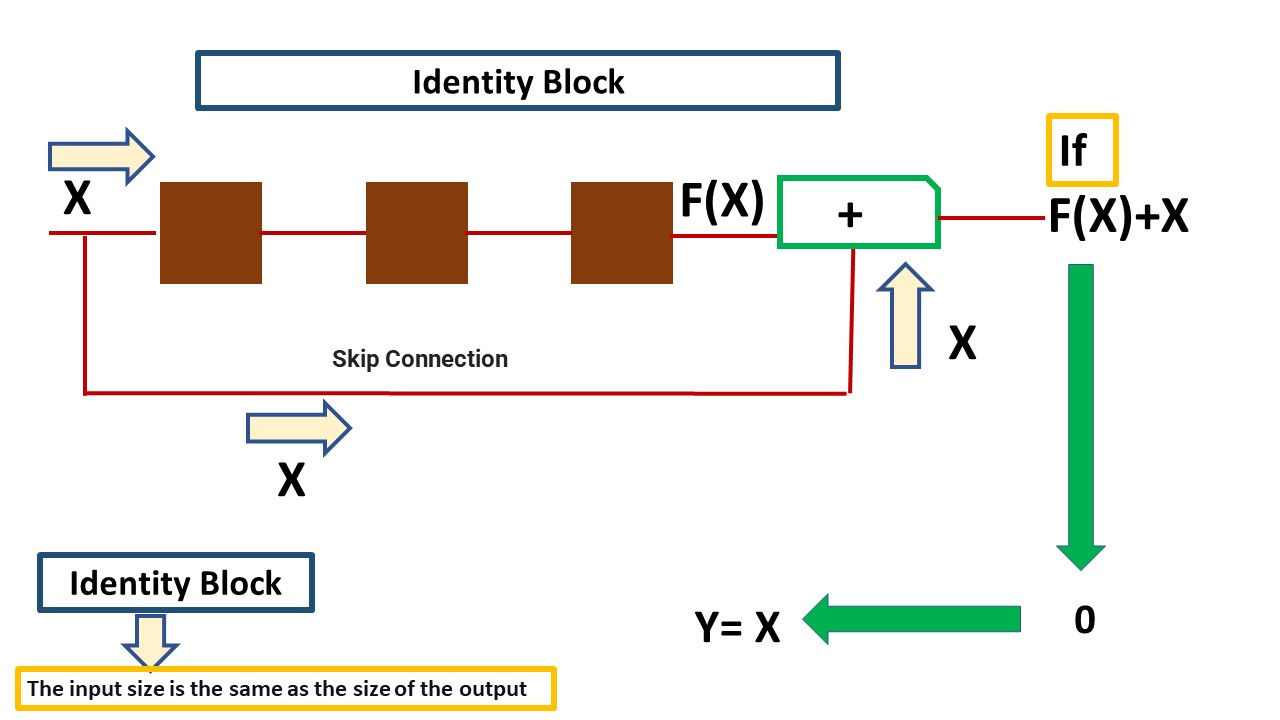

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/Identity Block.jpg', width=800,height=800)

# **11. Identity Block**
# **In the  identity block input size=  output size.**

## **Note:**
# **1.X is the input of shape (m, height, width, channel).**
# **2.f  is  the shape of the middle CONV's window for the primary path.**
#**3.[filters] is defined as the number of filters in the CONV layers of the primary path.**
#**4.Stage is an integer value and is used to name the layers.**
#**5.Block is a  string and  is used to name the layers.**
    
 


In [ ]:

def identity_block(X, f, filters, stage, block):
    
          

    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    
    F1, F2, F3 = filters
    
    
    X_shortcut = X
    
    
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2a')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

   
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

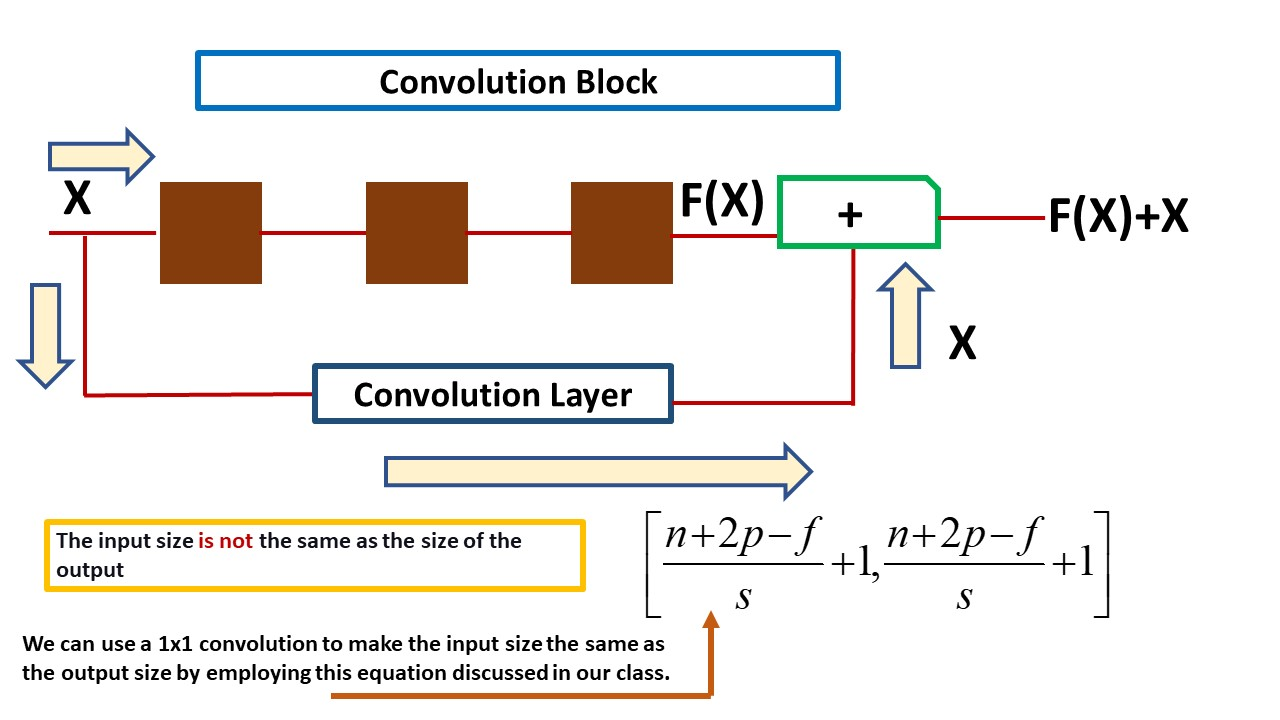

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/Convolution Block.jpg', width=800,height=800)

# **12.Convolutional Block**
# **In the convolutional block, input size is not equal to output size and a convolution layer is used[see the above figure].**

In [ ]:

def convolutional_block(X, f, filters, stage, block, s = 2):
    
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    
    F1, F2, F3 = filters
    
    
    X_shortcut = X


    
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a')(X) 
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)  
    X = Activation('relu')(X)

      
    
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'valid', name = conv_name_base + '2c')(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'valid', name = conv_name_base + '1')(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

     
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X


# **13.Creating ResNet50** 

#**ResNet50 Architecture :**
#**1.CONV2D** 
#**2.BATCHNORM**
#**3.RELU** 
#**4. MAXPOOL** 
#**5.-CONVBLOCK** 
#**6.IDBLOCK(Two Times)**
#**7.CONVBLOCK** 
#**8. IDBLOCK(Three Times)**
#**9.CONVBLOCK** 
#**10. IDBLOCK(Five Times)**
#**11. CONVBLOCK** 
#**12. IDBLOCK(Two Times)** 
#**13. AVGPOOL**
#**14. Flatten Layer**
#**15.Fully Connected Layer**



In [ ]:

def ResNet50(input_shape=(64, 64, 3), classes=4):
    

    
    X_input = Input(input_shape)

    
    X = ZeroPadding2D((3, 3))(X_input) 

    
    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(X)  
    X = BatchNormalization(axis=3, name='bn_conv1')(X) 
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X) 

    
    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    
      
   
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b') 
    
    
    
  
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')
    
  

# --------------------------------------------------------------------------------------------------------------
    

    
    X = convolutional_block(X, f = 3, filters = [128, 128, 512], stage = 3, block='a', s = 2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    
    X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

     
    X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    
    X = AveragePooling2D((2,2), name="avg_pool")(X)

    

    
    X = Flatten()(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model


# **14.We build and compile our ResNet50 model**

In [ ]:
model = ResNet50(input_shape = (64, 64, 3), classes = 4)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# **15. We obtain our model summary(ResNet50)**

In [ ]:
model.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1 (Conv2D)                 (None, 32, 32, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 bn_conv1 (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1[0][0]']                  
                                                                                           

#**16. We train our model**

In [ ]:
model.fit(train_x, train_y, epochs = 25, batch_size = 10) 

Epoch 1/25
18/18 [==============================] - 19s 38ms/step - loss: 2.6415 - accuracy: 0.5444
Epoch 2/25
18/18 [==============================] - 1s 37ms/step - loss: 0.7838 - accuracy: 0.8000
Epoch 3/25
18/18 [==============================] - 1s 38ms/step - loss: 0.5712 - accuracy: 0.8333
Epoch 4/25
18/18 [==============================] - 1s 38ms/step - loss: 0.6600 - accuracy: 0.8556
Epoch 5/25
18/18 [==============================] - 1s 38ms/step - loss: 0.5537 - accuracy: 0.8722
Epoch 6/25
18/18 [==============================] - 1s 37ms/step - loss: 0.2922 - accuracy: 0.9222
Epoch 7/25
18/18 [==============================] - 1s 38ms/step - loss: 0.1741 - accuracy: 0.9278
Epoch 8/25
18/18 [==============================] - 1s 37ms/step - loss: 0.2267 - accuracy: 0.9444
Epoch 9/25
18/18 [==============================] - 1s 38ms/step - loss: 0.3953 - accuracy: 0.9167
Epoch 10/25
18/18 [==============================] - 1s 38ms/step - loss: 0.2327 - accuracy: 0.9333
Epoch 11

# **17. We evaluate the model on our test data**

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

2/2 [==============================] - 2s 350ms/step - loss: 0.3617 - accuracy: 0.9130
Loss = 0.36166808009147644
Test Accuracy = 0.9130434989929199


#**18. We predict on one image** 

Input image shape: (1, 64, 64, 3)
[[0. 0. 1. 0.]]


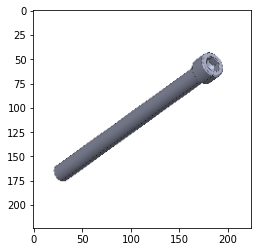

In [ ]:
from matplotlib.pyplot import imread
img_path = '/content/drive/MyDrive/Test-Image/CSH-ST-M12-165_203_5.png'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
my_image = imread(img_path)
imshow(my_image)
print(model.predict(x))

#**Part II**
#**MobileNetV1**
# **Before exploring Efficientnetv1, we should understand the workings of MobileNetV1 and MobileNetV2) because EfficientNet has used MobileNet. Indeed, the authors of EfficientNet in their paper entitled "EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks" have stated  [we demonstrate the effectiveness of this method on scaling up MobileNets and ResNet].**

#**MobileNet was introduced by a team of Google engineers in CVPR 2017 in their paper titled MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications. You can find this MobileNet paper at https://arxiv.org/abs/1704.04861.MobileNet proposes a depthwise separable convolution architecture that shrinks the neural network model so that it can work on the resource restriction issues of edge devices. MobileNet architecture consists of two main parts:**

#**Depthwise separable convolution**

#**Pointwise 1 x 1 convolution**

# **The following diagram shows how depthwise convolution works:**









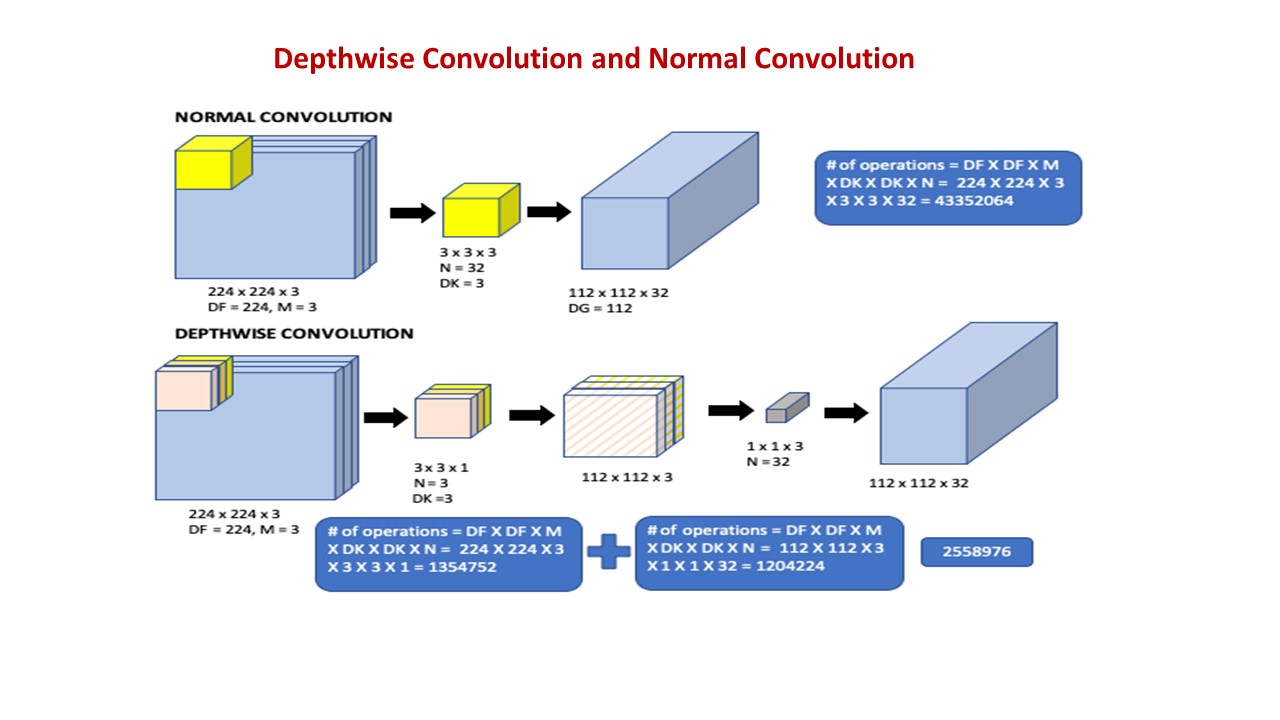

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MobileNet-Images/MobileNetV1-1.jpg', width=700,height=700)

#**The following diagram is the MobileNetV1 Architecture**

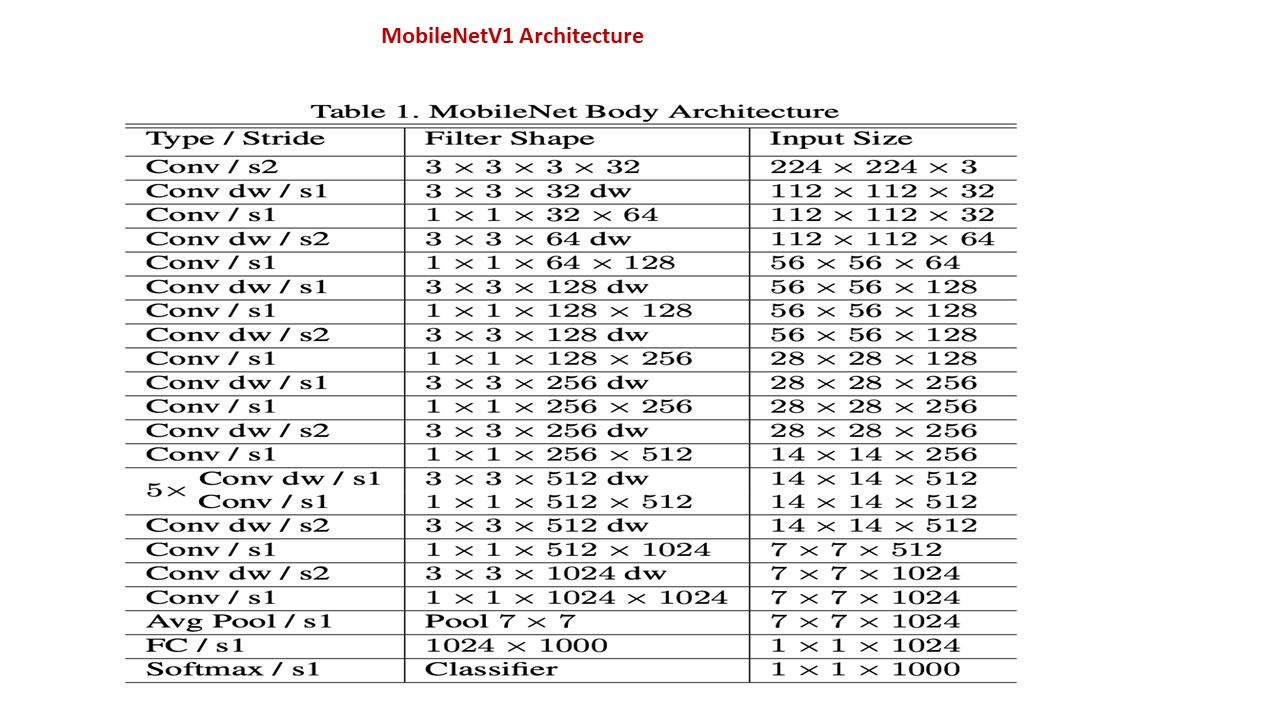

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MobileNet-Images/MobileNetV1-2.jpg', width=700,height=700)

#**1. Import libraries**

In [ ]:
from tensorflow.keras.layers import Input, DepthwiseConv2D, \
     Conv2D, BatchNormalization, ReLU, AvgPool2D, Flatten, Dense

#**2. MobileNet block**

In [ ]:
def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
 
    x = Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

#**3.Stem of the model**

In [ ]:
input = Input(shape=(224, 224, 3))
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

# **4.Main part of the model**

In [ ]:
x = mobilenet_block(x, filters=64, strides=1)

In [ ]:
x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

In [ ]:
x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)

In [ ]:
x = mobilenet_block(x, filters=512, strides=2)
for _ in range(5):
    x = mobilenet_block(x, filters=512, strides=1)


# **5. Final model**

In [ ]:
def mobilenet_block(x, filters, strides):
    x = DepthwiseConv2D(kernel_size=3, strides=strides, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

INPUT_SHAPE = 224, 224, 3

input = Input(INPUT_SHAPE)
x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)

x = mobilenet_block(x, filters=64, strides=1)

x = mobilenet_block(x, filters=128, strides=2)
x = mobilenet_block(x, filters=128, strides=1)

x = mobilenet_block(x, filters=256, strides=2)
x = mobilenet_block(x, filters=256, strides=1)

x = mobilenet_block(x, filters=512, strides=2)
for _ in range(5):
    x = mobilenet_block(x, filters=512, strides=1)
  
x = mobilenet_block(x, filters=1024, strides=2)
x = mobilenet_block(x, filters=1024, strides=1)

x = AvgPool2D(pool_size=7, strides=1)(x)
output = Dense(units=1000, activation='softmax')(x)

from tensorflow.keras import Model

model = Model(inputs=input, outputs=output)

#**Part II**
#**MobileNetV2**

# **Now, we'll discuss a lightweight CNN model called MobileNet (MobileNetV2: Inverted Residuals and Linear Bottlenecks, https://arxiv.org/abs/1801.04381). We'll focus on the second revision of this idea (MobileNetV1 was introduced in MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications, https://arxiv.org/abs/1704.04861). MobileNet is aimed at devices with limited memory and computing power, such as mobile phones. To reduce its footprint, the network uses DSC, linear bottlenecks, and inverted residuals.**

#**One way to do this is with 1×1 bottleneck convolutions. However, the authors of the paper argue that if this convolution is followed by non-linearity like ReLU, this might lead to a loss of manifold information. If the ReLU input is larger than 0, then the output of this unit is equivalent to the linear transformation of the input. But, if the input is smaller, then the ReLU collapses, and the information of that unit is lost. Because of this, MobileNet uses 1×1 bottleneck convolution without non-linear activation.**

#**The authors argue that the bottlenecks actually contain all the necessary information, while an expansion layer acts merely as an implementation detail that accompanies a non-linear transformation of the tensor. Because of this, they propose having shortcut connections between the bottleneck connections instead. Based on these properties, the MobileNet model is composed of the following building blocks:**


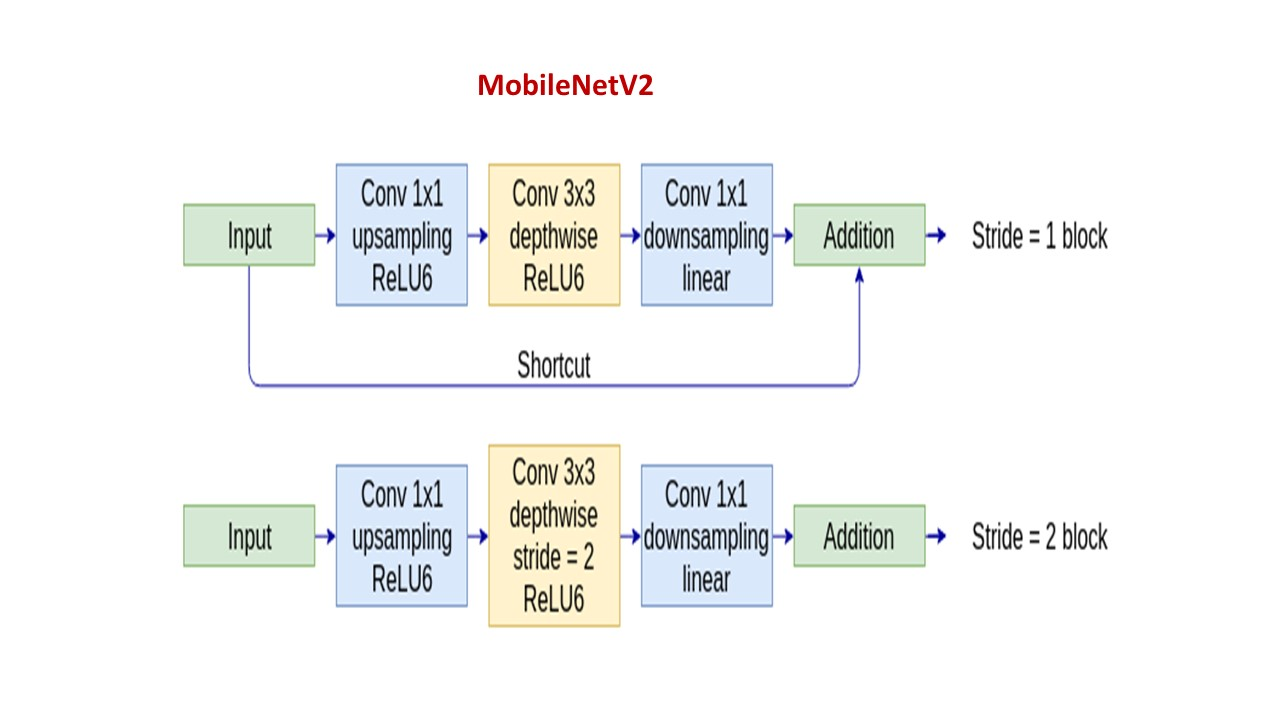

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MobileNet-Images/MobileNetV2-1.jpg', width=800,height=800)

#**The following table shows the relationship between the input and output dimensions of the blocks:**

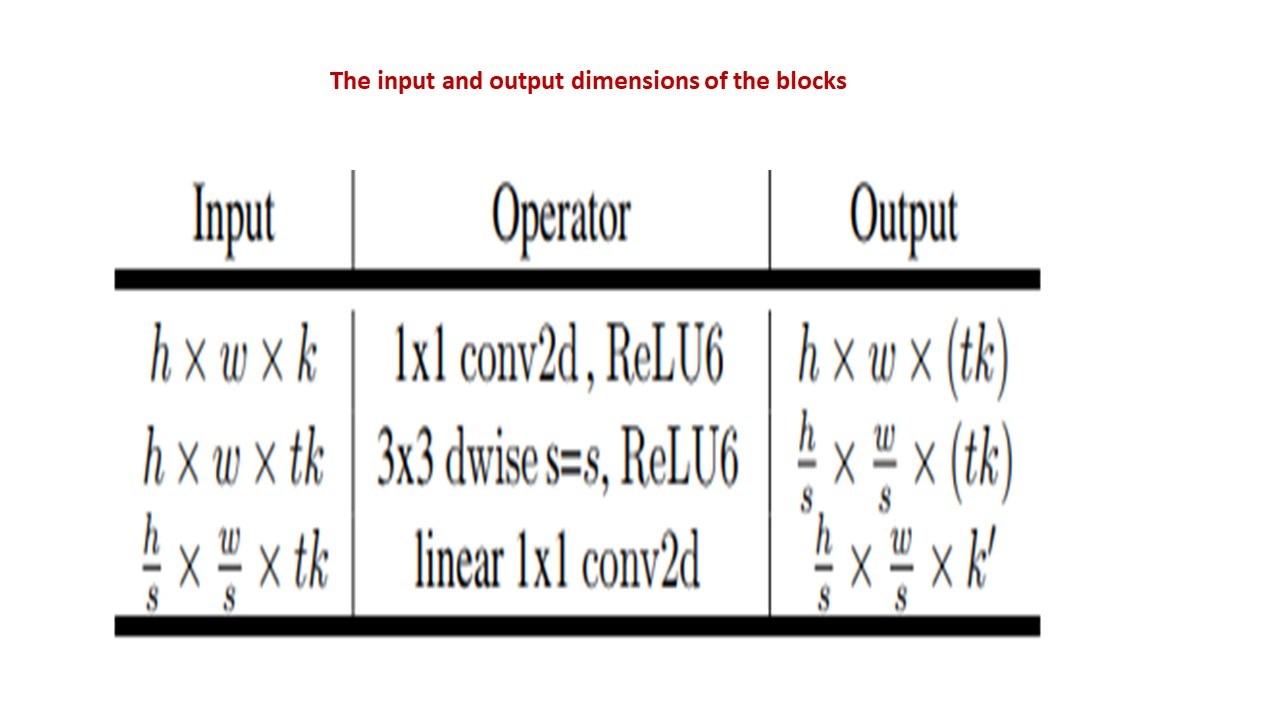

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MobileNet-Images/MobileNet-V2-2.jpg', width=900,height=900)

#**In the following table, h and w are the input height and width, s is the stride, and k and k' are the input and output number of channels. Finally, here is the full model architecture:**

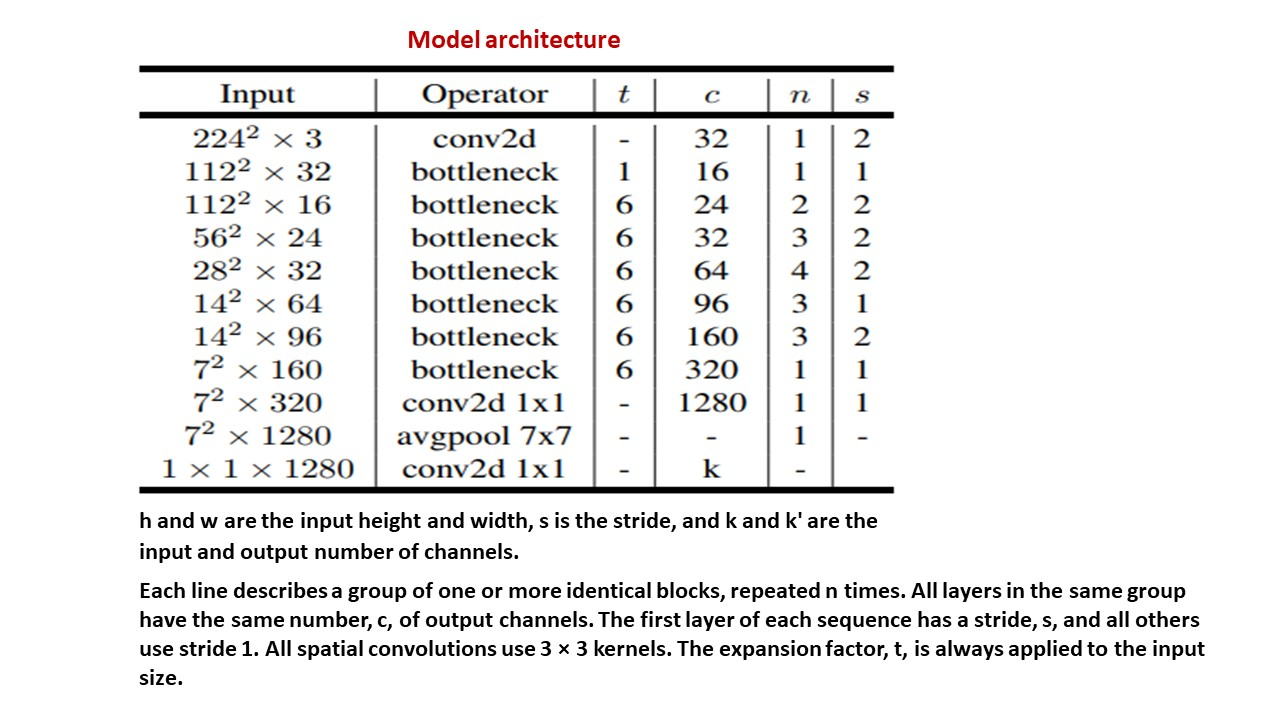

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/MobileNet-Images/MobileNetV2-3.jpg', width=1000,height=1000)

In [ ]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, ReLU, BatchNormalization, add,Softmax, AveragePooling2D, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
def expansion_block(x,t,filters,block_id):
    prefix = 'block_{}_'.format(block_id)
    total_filters = t*filters
    x = Conv2D(total_filters,1,padding='same',use_bias=False, name = prefix +'expand')(x)
    x = BatchNormalization(name=prefix +'expand_bn')(x)
    x = ReLU(6,name = prefix +'expand_relu')(x)
    return x

def depthwise_block(x,stride,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = DepthwiseConv2D(3,strides=(stride,stride),padding ='same', use_bias = False, name = prefix + 'depthwise_conv')(x)
    x = BatchNormalization(name=prefix +'dw_bn')(x)
    x = ReLU(6,name=prefix +'dw_relu')(x)
    return x

def projection_block(x,out_channels,block_id):
    prefix = 'block_{}_'.format(block_id)
    x = Conv2D(filters = out_channels,kernel_size = 1,padding='same',use_bias=False,name= prefix + 'compress')(x)
    x = BatchNormalization(name=prefix +'compress_bn')(x)
    return x
def Bottleneck(x,t,filters, out_channels,stride,block_id):
    y = expansion_block(x,t,filters,block_id)
    y = depthwise_block(y,stride,block_id)
    y = projection_block(y, out_channels,block_id)
    if y.shape[-1]==x.shape[-1]:
        y = add([x,y])
    return y

In [ ]:
def MobileNetV2(input_image = (224,224,3), n_classes=1000):
    input = Input(input_image)

    x = Conv2D(32,kernel_size=3,strides=(2,2),padding = 'same', use_bias=False)(input)
    x = BatchNormalization(name='conv1_bn')(x)
    x = ReLU(6, name = 'conv1_relu')(x)

 

    x = depthwise_block(x,stride=1,block_id=1)
    x = projection_block(x, out_channels=16,block_id=1)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 2,block_id = 2)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 24, stride = 1,block_id = 3)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 2,block_id = 4)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 5)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 32, stride = 1,block_id = 6)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 2,block_id = 7)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 8)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 9)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 64, stride = 1,block_id = 10)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 11)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 12)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 96, stride = 1,block_id = 13)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 2,block_id = 14)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 15)
    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 160, stride = 1,block_id = 16)

    x = Bottleneck(x, t = 6, filters = x.shape[-1], out_channels = 320, stride = 1,block_id = 17)


    
    x = Conv2D(filters = 1280,kernel_size = 1,padding='same',use_bias=False, name = 'last_conv')(x)
    x = BatchNormalization(name='last_bn')(x)
    x = ReLU(6,name='last_relu')(x)

    
    x = GlobalAveragePooling2D(name='global_average_pool')(x)

    output = Dense(n_classes,activation='softmax')(x)

    model = Model(input, output)

    return model

In [ ]:
n_classes = 1000
input_shape = (224,224,3)

model = MobileNetV2(input_shape,n_classes)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_26 (Conv2D)             (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 112, 112, 32  128         ['conv2d_26[0][0]']              
                                )                                                           

#**Part III**

# **EfficientNet-Version 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


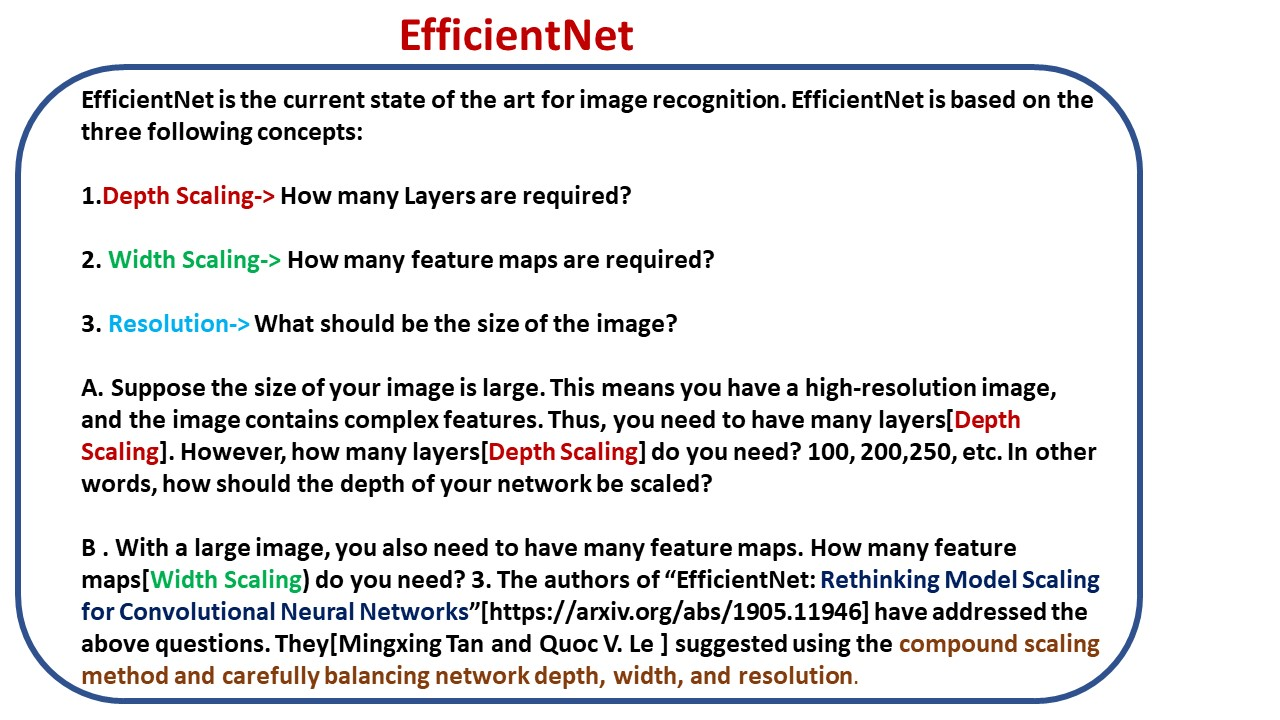

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/EfficientNet-1.jpg', width=900,height=900)

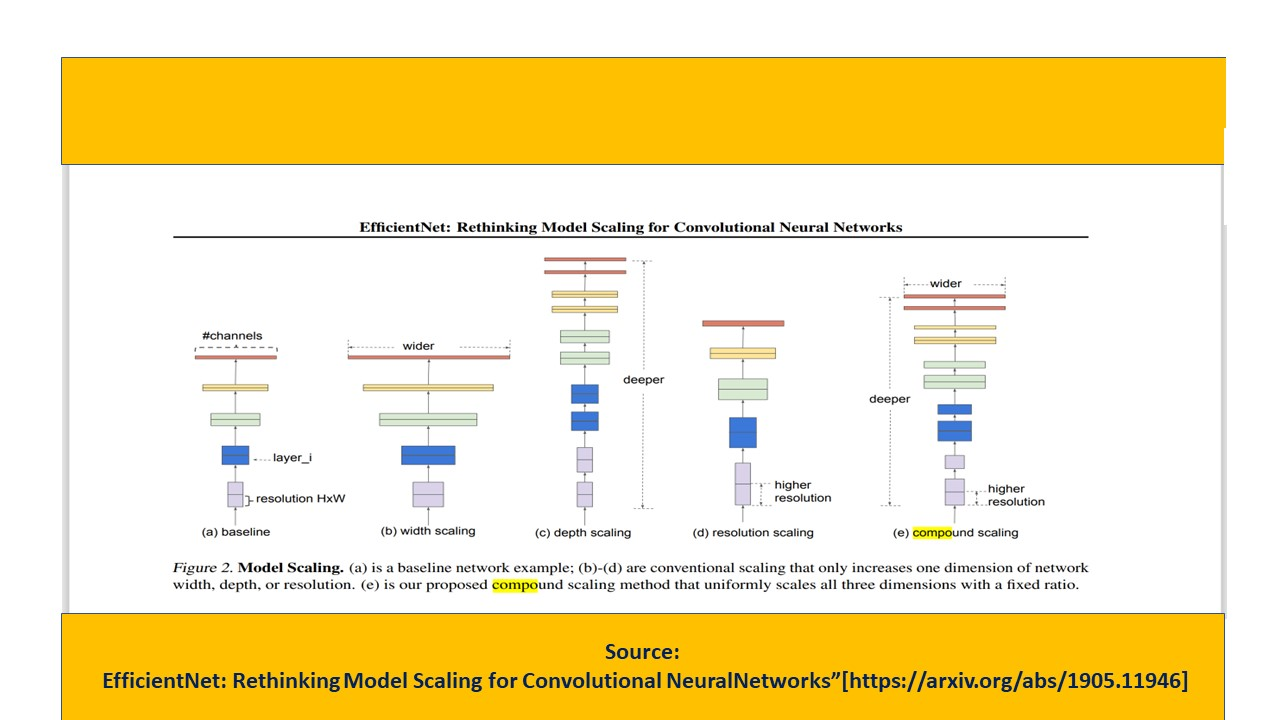

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/EfficientNet-2.jpg', width=900,height=900)

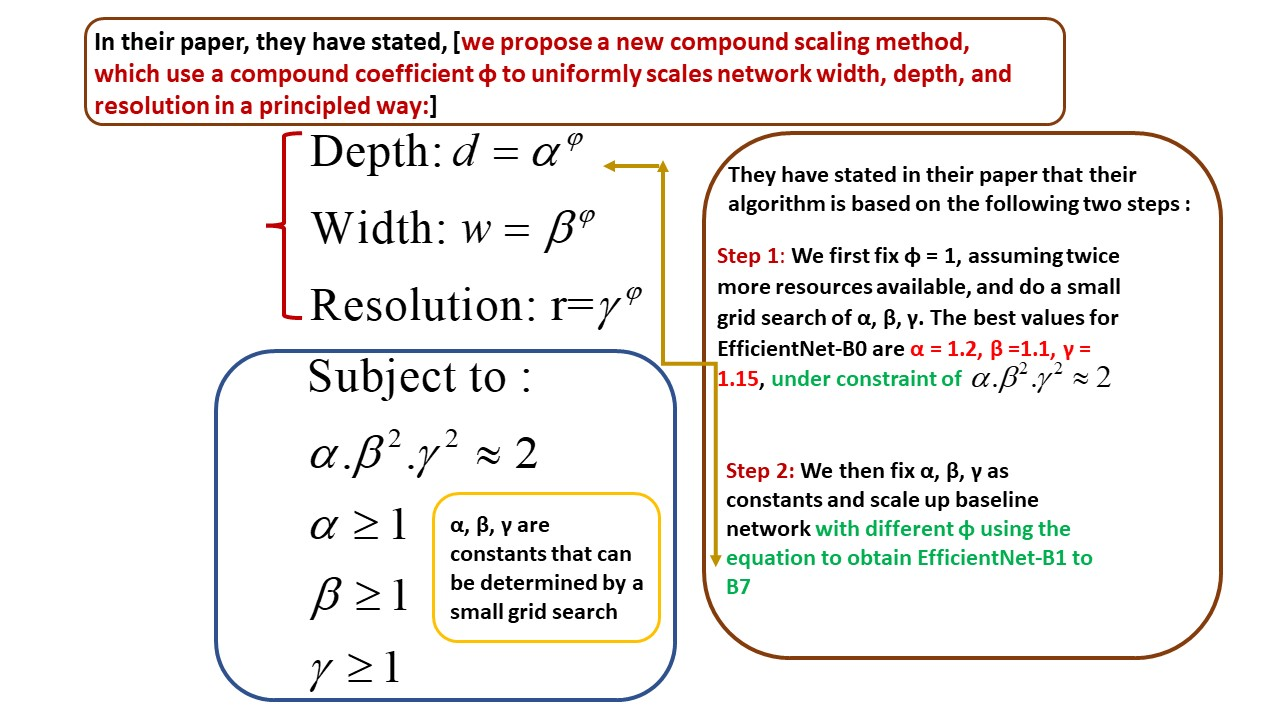

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/ResNet-EfficientNet-Images/EfficientNet-3.jpg', width=900,height=900)

#**1. Import libraries**

In [ ]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import os

import cv2

from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

import matplotlib.pyplot as plt

from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


#**2.This is a skin-related dataset and contains three classes[Nevus, Carcinoma, and Melanoma]**

In [ ]:
dataset_path = os.listdir('/content/drive/MyDrive/EFFdataset')

print (dataset_path)  



['Nevus', 'Carcinoma', 'Melanoma']


# **3.We obtain all the file names in the first for loop, and in the second loo, we add them to the empty list of class labels.**

In [ ]:
class_labels = []

for item in dataset_path:
 
 all_classes = os.listdir('/content/drive/MyDrive/EFFdataset' + '/' +item)
 

 
 for skin_disease in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + skin_disease))
    
    
# # initialize an empty list (the labels)
# label_filepath = []

# for class_ in classes:

#   current_files = os.listdir(dataset_path + '/' + class_)
  
#   for file_ in current_files:
#     label_filepath.append((class_, str(dataset_path + '/' +class_) + '/' + file_))

# label_filepath[0:4]

#**4. We construct our dataFrame.**

In [ ]:
       
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

  Labels                                image
0  Nevus  dataset_path/Nevus/ISIC_0000081.jpg
1  Nevus  dataset_path/Nevus/ISIC_0000067.jpg
2  Nevus  dataset_path/Nevus/ISIC_0000080.jpg
3  Nevus  dataset_path/Nevus/ISIC_0000082.jpg
4  Nevus  dataset_path/Nevus/ISIC_0000068.jpg
      Labels                                          image
95  Melanoma  dataset_path/Melanoma/ISIC_0000513 - Copy.jpg
96  Melanoma         dataset_path/Melanoma/ISIC_0000516.jpg
97  Melanoma         dataset_path/Melanoma/ISIC_0000502.jpg
98  Melanoma         dataset_path/Melanoma/ISIC_0000462.jpg
99  Melanoma         dataset_path/Melanoma/ISIC_0000463.jpg


#**5.We check our observations in each class.** 

In [ ]:

print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  100
Nevus        35
Carcinoma    33
Melanoma     32
Name: Labels, dtype: int64


# **6. We loop over all the three folders and obtain the name of all the images. Then we resize our images and append the images to the images=[] list and labels to the labels [] list.** 

In [ ]:
path = '/content/drive/MyDrive/EFFdataset/'

dataset_path = os.listdir('/content/drive/MyDrive/EFFdataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)


# **7. We perform scaling on our images.**

In [ ]:
images = np.array(images)

images = images.astype('float32') / 255.0
images.shape 


(100, 224, 224, 3)

#**8.We perform LabelEncoding and OneHotencoding.**

In [ ]:
y=df['Labels'].values
print(y)

y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus'
 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus'
 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus'
 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus' 'Nevus'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Carcinoma'
 'Carcinoma' 'Carcinoma' 'Carcinoma' 'Melanoma' 'Melanoma' 'Melanoma'
 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma'
 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma'
 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma'
 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma' 'Melanoma'
 'Melanoma' '

In [ ]:
y=y.reshape(-1,1)


ct = ColumnTransformer([('One_h', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) 
print(Y[:4])
print(Y[20:])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0

# **9. We do train-test-split.**

In [ ]:
images, Y = shuffle(images, Y, random_state=2)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.10, random_state=42)


print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(90, 224, 224, 3)
(90, 3)
(10, 224, 224, 3)
(10, 3)


#**10.We implement EfficientNet- Version 1. Here we are not using Transfer Learning. We use our dataset to train our model with EfficientNet- Version 1. Since we have a limited number of images, we will not get high accuracy. Indeed, if you can get more images, the model performance will most likely be improved.**

In [ ]:
NUM_CLASSES = 3
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)


inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))




outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)

In [ ]:
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"] )

model.summary()

hist = model.fit(train_x, train_y, epochs=30, verbose=2)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 3)                4053414   
                                                                 
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/30
3/3 - 23s - loss: 5.4946 - accuracy: 0.4889 - 23s/epoch - 8s/step
Epoch 2/30
3/3 - 1s - loss: 5.3209 - accuracy: 0.3667 - 891ms/epoch - 297ms/step
Epoch 3/30
3/3 - 1s - loss: 3.9896 - accuracy: 0.4111 - 895ms/epoch - 298ms/step
Epoch 4/30
3/3 - 1s - loss: 3.0233 - accuracy: 0.4333 - 891ms/epoch - 297ms/step
Epoch 5/30
3/3 - 1s - loss: 2.3377 - accuracy: 0.4667 - 865ms/epoch - 288ms/step
Epoch 6/30
3/3 - 1s - loss: 1.5716 - ac

# **11.We plot our accuracy.**

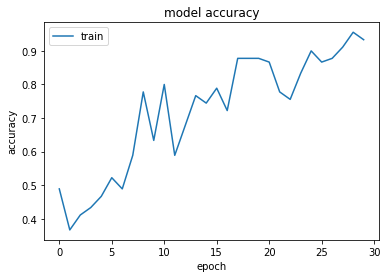

In [ ]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

1/1 [==============================] - 2s 2s/step - loss: 1.7052 - accuracy: 0.3000
Loss = 1.7052189111709595
Test Accuracy = 0.30000001192092896


#**Part IV**
#**Section A**

#**[You only look once] Yolo Algorithm**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


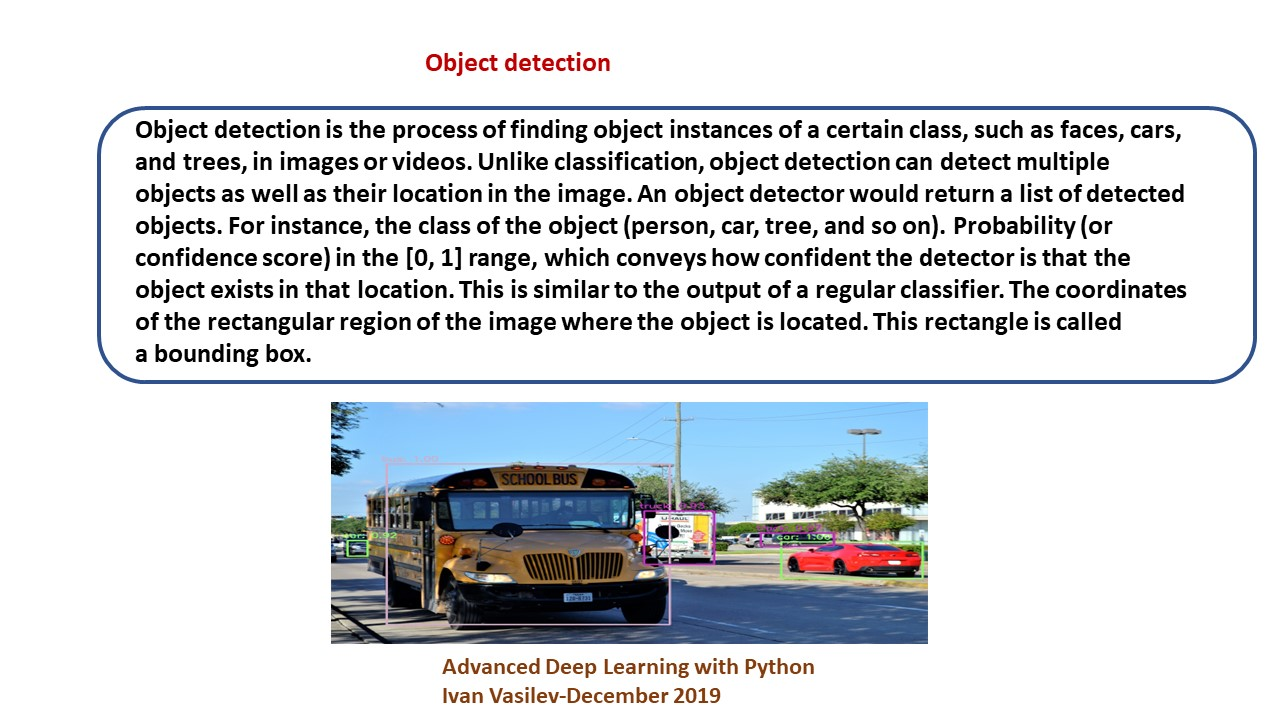

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-00.jpg', width=1000,height=1000)

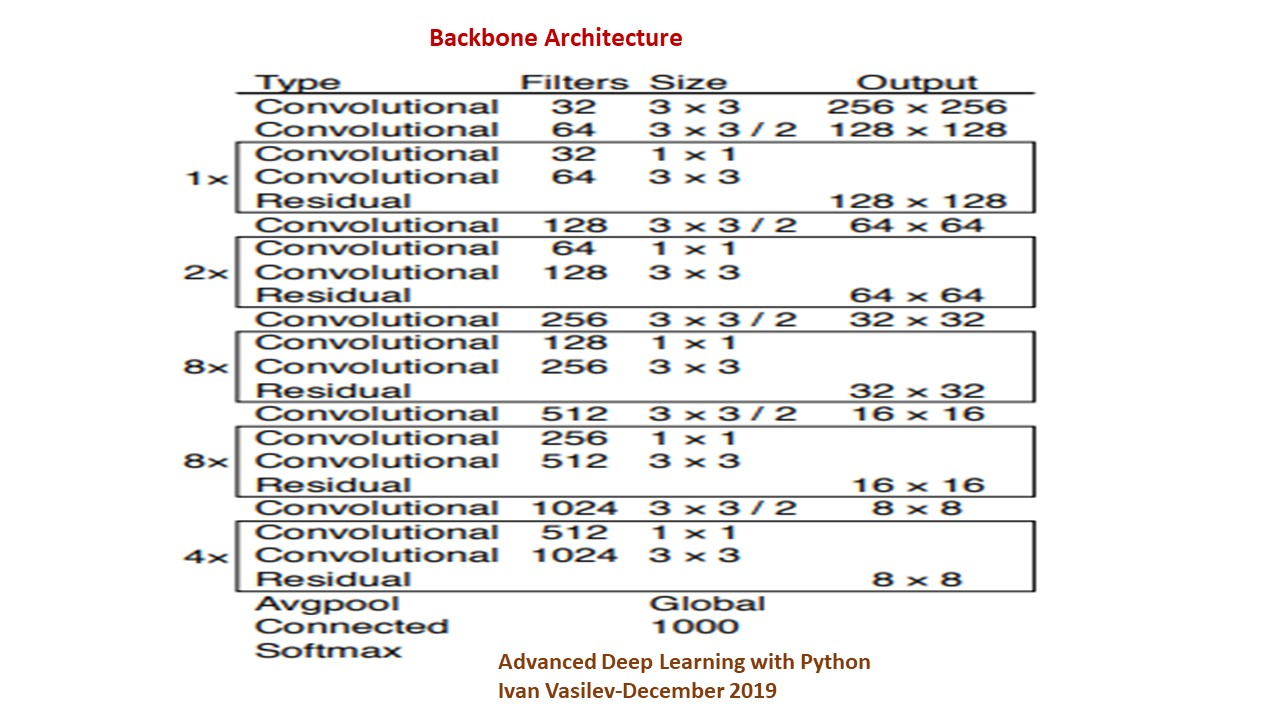

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-0.jpg', width=1000,height=1000)

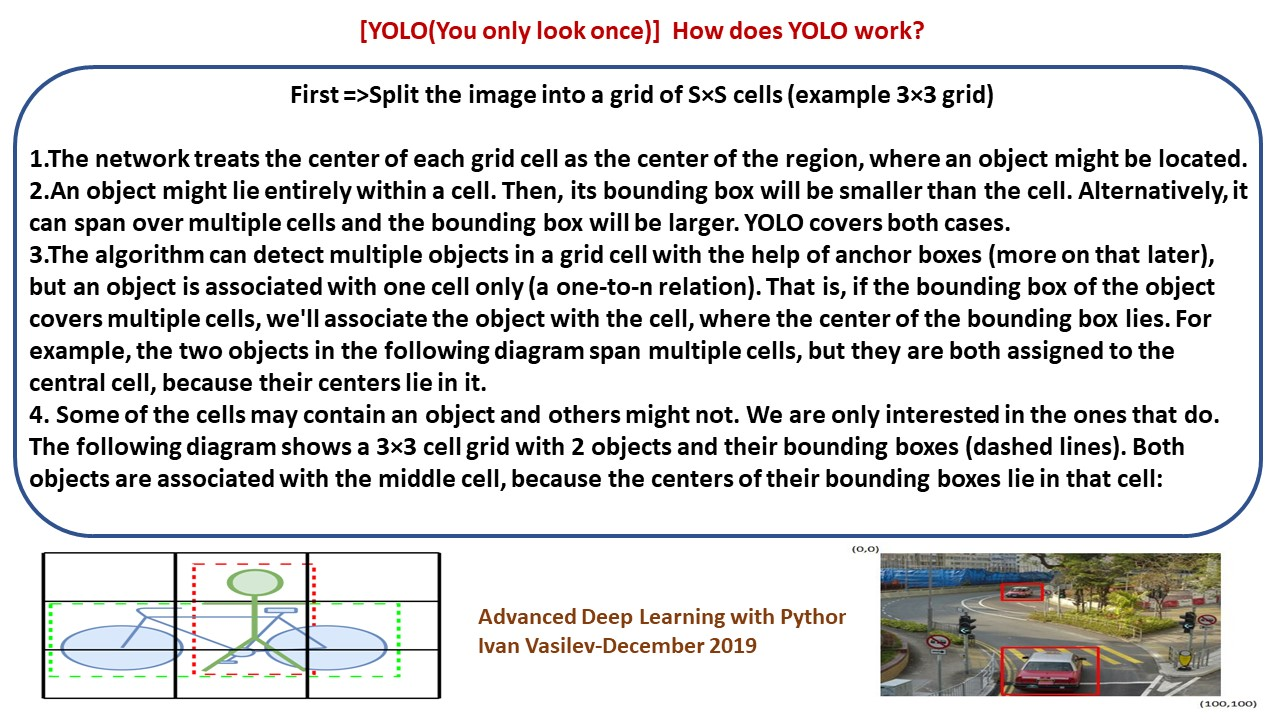

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-1.jpg', width=1000,height=1000)

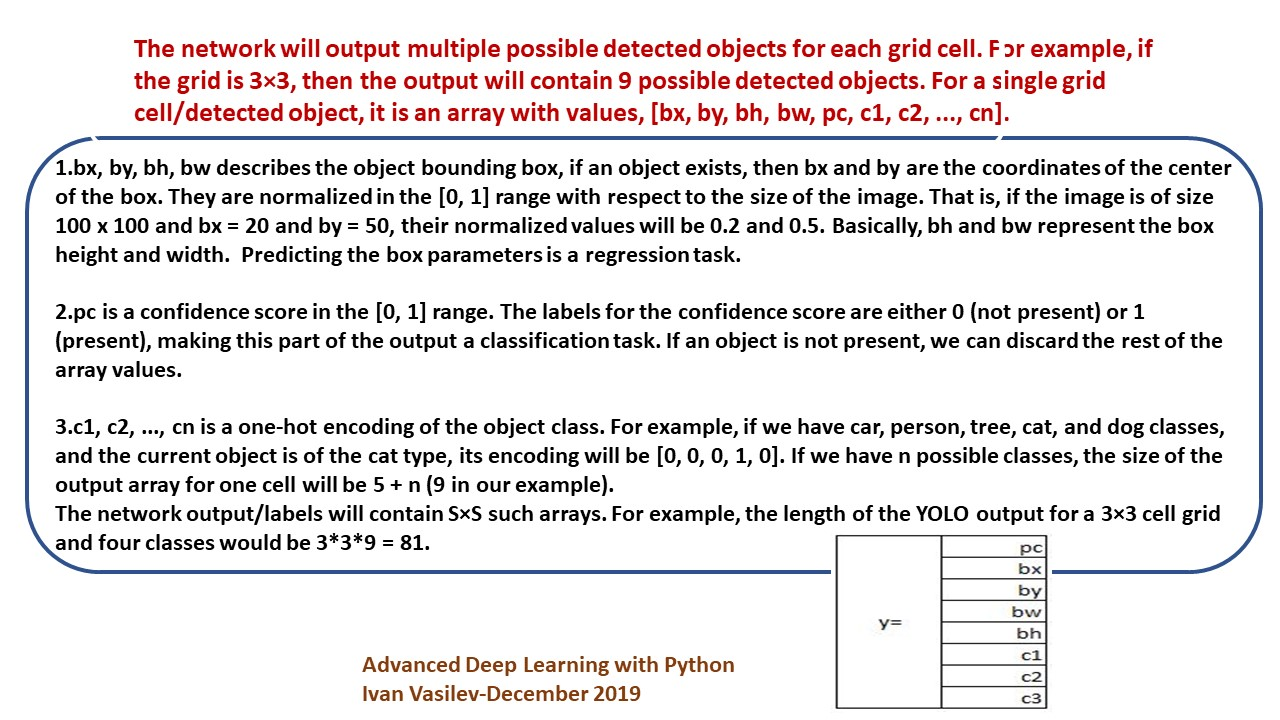

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-2.jpg', width=1000,height=1000)

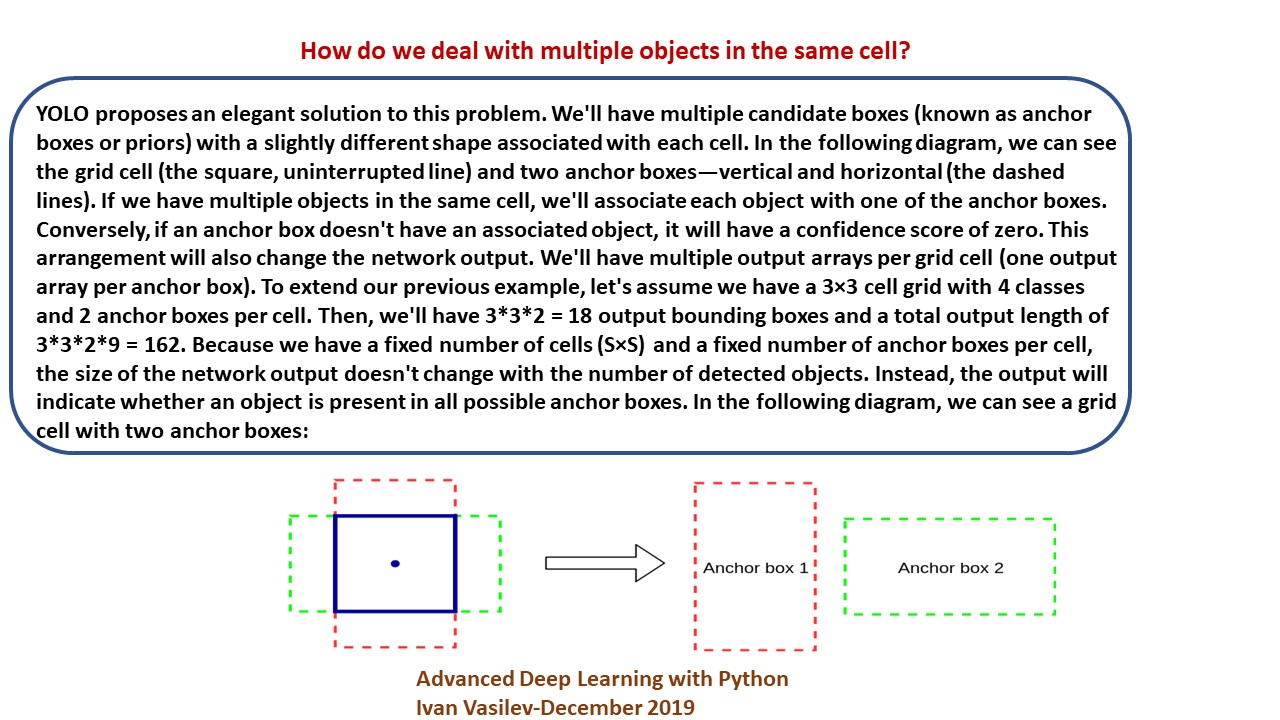

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-3.jpg', width=1000,height=1000)

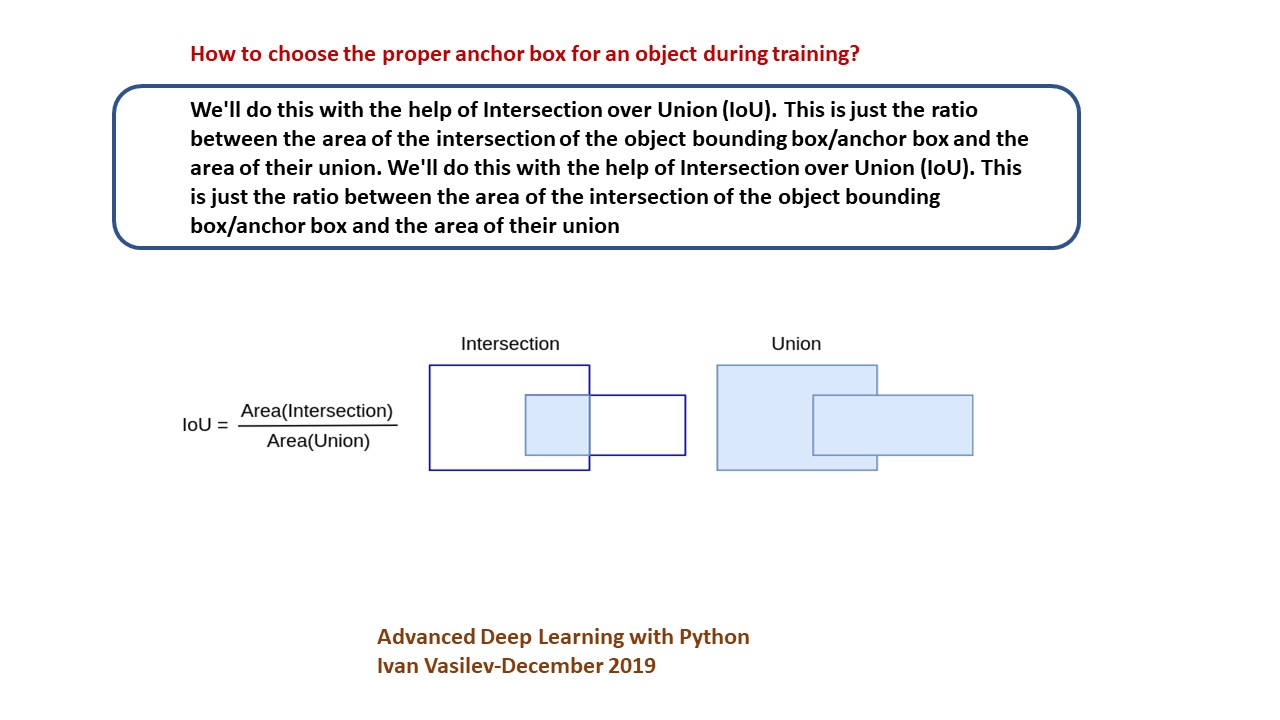

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-4.jpg', width=1000,height=1000)

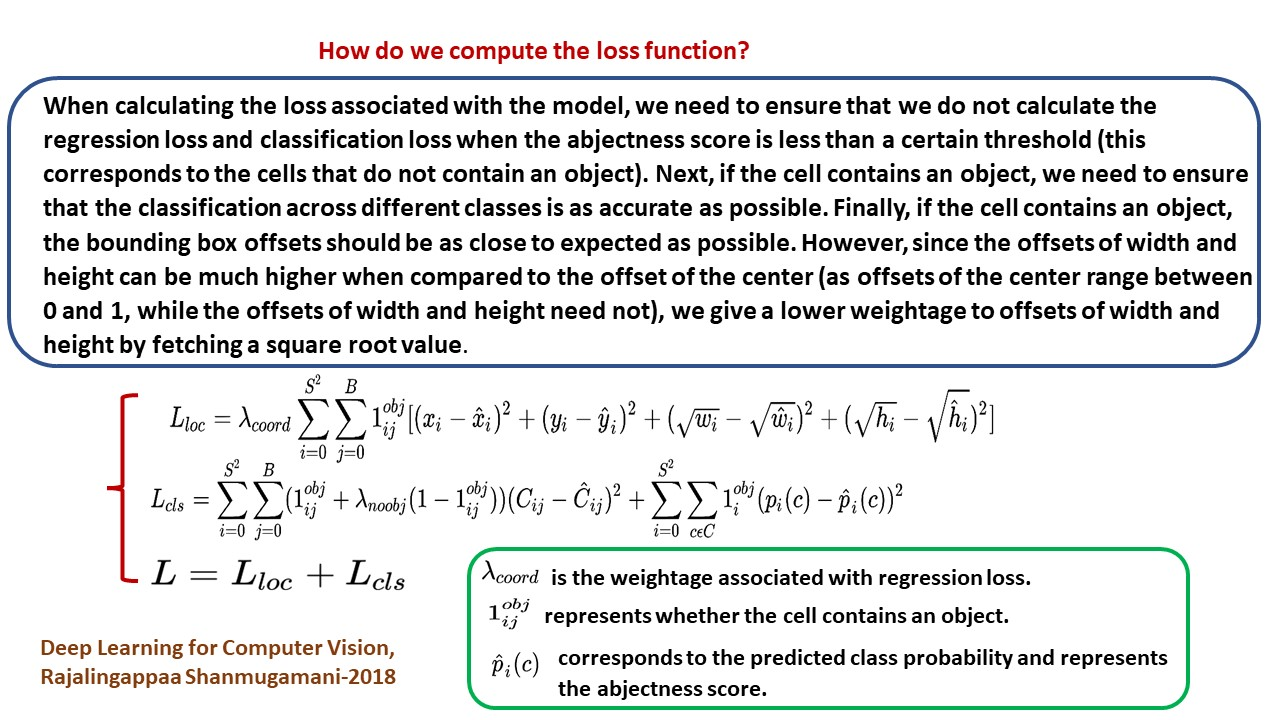

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-5.jpg', width=1000,height=1000)

# **1. You need to unzip the yolo3 weights that I have put in the Google drive and put it in a new folder. I named it YL.**

In [ ]:
from zipfile import ZipFile
with ZipFile('drive/MyDrive/Yolo-dataset/yolov3.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/YL')

# **2.Import libraries**

In [ ]:
import struct
import numpy as np
from keras.layers import Conv2D
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.layers import UpSampling2D
from keras.layers.merge import add, concatenate
from keras.models import Model
import cv2
from google.colab.patches import cv2_imshow

from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


from matplotlib import pyplot
from matplotlib.patches import Rectangle


# **3.We write a function for our convolution block, which is our residual block( please refer to Resnet50)**


In [ ]:
def _conv_block(inp, convs, skip=True):
	x = inp
	count = 0
	for conv in convs:
		if count == (len(convs) - 2) and skip:
			skip_connection = x
		count += 1
		if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) 
		x = Conv2D(conv['filter'],
				   conv['kernel'],
				   strides=conv['stride'],
				   padding='valid' if conv['stride'] > 1 else 'same', 
				   name='conv_' + str(conv['layer_idx']),
				   use_bias=False if conv['bnorm'] else True)(x)
		if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
		if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)
	return add([skip_connection, x]) if skip else x

#**4. We build our architecture and use stride to reduce the size of our image.Note: Yolov3 detects at three levels[yolo_82, yolo_94, and yolo_106]**

In [ ]:
def make_yolov3_model():
	input_image = Input(shape=(None, None, 3))
	#[1] Layer  0 => 4
	x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
								  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
								  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
								  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])
	#[2] Layer  5 => 8
	x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
						{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])
	#[3] Layer  9 => 11
	x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 9},
						{'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])
	#[4] Layer 12 => 15
	x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
						{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
						{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])
	#[5] Layer 16 => 36
	for i in range(7):
		x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
							{'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
	skip_36 = x
	#[6] Layer 37 => 40
	x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])
	#[7] Layer 41 => 61
	for i in range(7):
		x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
							{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
	skip_61 = x
	#[8] Layer 62 => 65
	x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])
	#[9] Layer 66 => 74
	for i in range(3):
		x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
							{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
	#[10] Layer 75 => 79
	x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
						{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
						{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)
	#[11]. Layer 80 => 82
	yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
							  {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)
	#[12] Layer 83 => 86
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_61])
	#[13] Layer 87 => 91
	x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
						{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
						{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)
	#[14] Layer 92 => 94
	yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
							  {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)
	#[15] Layer 95 => 98
	x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
	x = UpSampling2D(2)(x)
	x = concatenate([x, skip_36])
	#[16] Layer 99 => 106
	yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
							   {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
							   {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
							   {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)
	model = Model(input_image, [yolo_82, yolo_94, yolo_106])
	return model

# **5. We read and load the weights of the coco dataset[https://cocodataset.org/#home] trained by darknet. Darknet is an open-source neural network framework written in C and CUDA[https://pjreddie.com/darknet/ ].I have put the yolov3.weights in the Google drive. You can also download it from=> https://pjreddie.com/darknet/yolo/**

In [ ]:
class WeightReader:
	def __init__(self, weight_file):
		with open(weight_file, 'rb') as w_f:
			major,	= struct.unpack('i', w_f.read(4))
			minor,	= struct.unpack('i', w_f.read(4))
			revision, = struct.unpack('i', w_f.read(4))
			if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
				w_f.read(8)
			else:
				w_f.read(4)
			transpose = (major > 1000) or (minor > 1000)
			binary = w_f.read()
		self.offset = 0
		self.all_weights = np.frombuffer(binary, dtype='float32')

	def read_bytes(self, size):
		self.offset = self.offset + size
		return self.all_weights[self.offset-size:self.offset]

	def load_weights(self, model):
		for i in range(106):
			try:
				conv_layer = model.get_layer('conv_' + str(i))
				print("loading weights of convolution #" + str(i))
				if i not in [81, 93, 105]:
					norm_layer = model.get_layer('bnorm_' + str(i))
					size = np.prod(norm_layer.get_weights()[0].shape)
					beta  = self.read_bytes(size) 
					gamma = self.read_bytes(size) 
					mean  = self.read_bytes(size) 
					var   = self.read_bytes(size) 
					weights = norm_layer.set_weights([gamma, beta, mean, var])
				if len(conv_layer.get_weights()) > 1:
					bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel, bias])
				else:
					kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
					kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
					kernel = kernel.transpose([2,3,1,0])
					conv_layer.set_weights([kernel])
			except ValueError:
				print("no convolution #" + str(i))

	def reset(self):
		self.offset = 0

# **6. We define our model**

In [ ]:
model = make_yolov3_model()

#**7. We read the weights**

In [ ]:
weight_reader = WeightReader('/content/drive/MyDrive/YL/yolov3.weights')

# **8. We are loading the weights**

In [ ]:
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

# **9. We save the model**

In [ ]:
model.save('model.h5')

#**10.We use the saved model for our object detection task.**

In [ ]:
model = load_model('model.h5')

input_w, input_h = 416, 416

# **11. First, we will draw bounding boxes with the class BoundBox. Then we obtain our labels with the get label function, and finally, we compute the probability of each class with the get score function.**

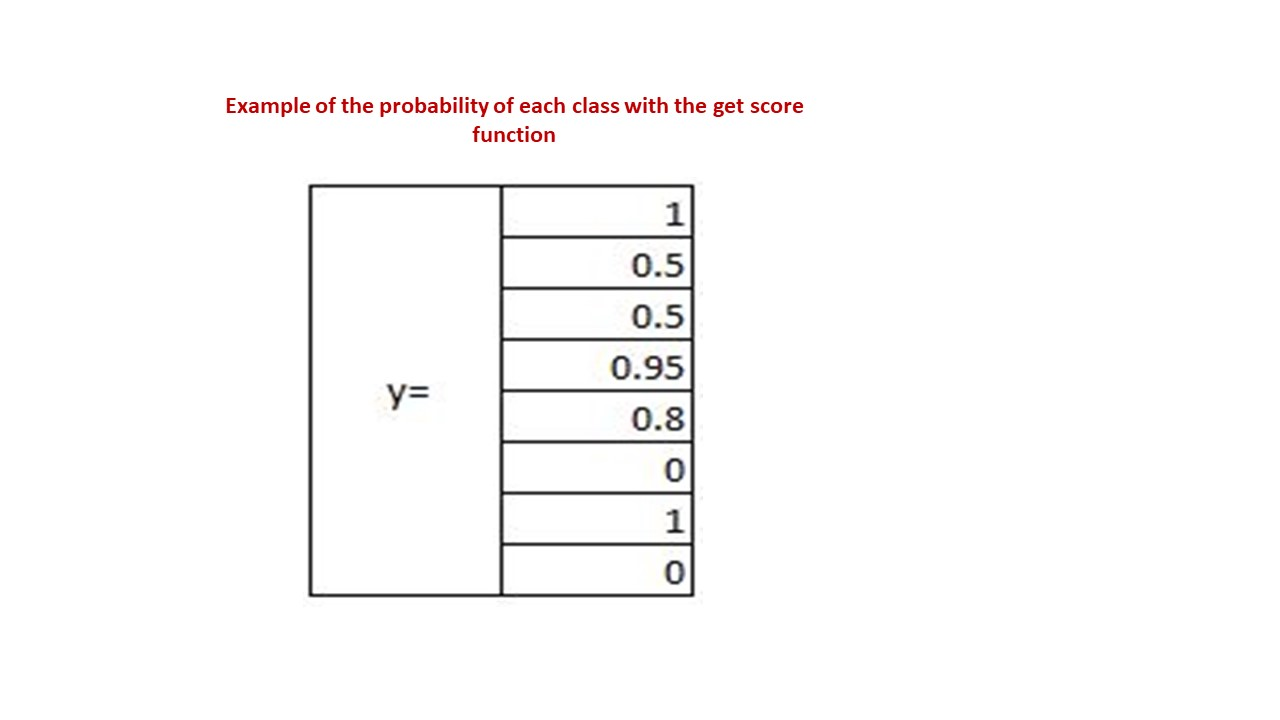

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/YL/Yolo-6.jpg', width=800,height=500)

In [ ]:
class BoundBox:
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1

	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)

		return self.label

	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]

		return self.score


def _sigmoid(x):
	return 1. / (1. + np.exp(-x))

# **12.We obtain all boxes** 

In [ ]:
def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
	grid_h, grid_w = netout.shape[:2] 
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1)) 
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
	netout[..., 5:] *= netout[..., 5:] > obj_thresh

	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			
			objectness = netout[int(row)][int(col)][b][4]
			if(objectness.all() <= obj_thresh): continue
			
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w 
			y = (row + y) / grid_h 
			w = anchors[2 * b + 0] * np.exp(w) / net_w 
			h = anchors[2 * b + 1] * np.exp(h) / net_h 
			
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes


def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
	new_w, new_h = net_w, net_h
	for i in range(len(boxes)):
		x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
		y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
		boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
		boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
		boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
		boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

# **13.We compute the IOU = Intersection/Union**

In [ ]:
def _interval_overlap(interval_a, interval_b):
	x1, x2 = interval_a
	x3, x4 = interval_b
	if x3 < x1:
		if x4 < x1:
			return 0
		else:
			return min(x2,x4) - x1
	else:
		if x2 < x3:
			 return 0
		else:
			return min(x2,x4) - x3

        
def bbox_iou(box1, box2):
	intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
	intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
	intersect = intersect_w * intersect_h
    
    
	w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin  
	w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
    
    
	union = w1*h1 + w2*h2 - intersect
	return float(intersect) / union

# **14.We use Non-Maximum Suppression (NMS) to omit multiple detected boxes for one object.**

In [ ]:
def do_nms(boxes, nms_thresh):    
	if len(boxes) > 0:
		nb_class = len(boxes[0].classes)
	else:
		return
	for c in range(nb_class):
		sorted_indices = np.argsort([-box.classes[c] for box in boxes])
		for i in range(len(sorted_indices)):
			index_i = sorted_indices[i]
			if boxes[index_i].classes[c] == 0: continue
			for j in range(i+1, len(sorted_indices)):
				index_j = sorted_indices[j]
				if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
					boxes[index_j].classes[c] = 0
                                        

#**15. We make our image ready by resizing and rescaling it. Then we will make it into an numpy array.**

In [ ]:
def load_image_pixels(filename, shape):
	
	image = load_img(filename) 
	width, height = image.size
	
	image = load_img(filename, target_size=shape) 
	
	image = img_to_array(image)
	
	image = image.astype('float32')
	image /= 255.0 
	
	image = expand_dims(image, 0)
	return image, width, height

#**16. We store our image and make it into [ image, width, height].**

In [ ]:
photo_filename = '/content/drive/MyDrive/YL/scene2.jpg'
input_w, input_h = 416, 416

image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))

print(image.shape)


(1, 416, 416, 3)


#**17.We load our model and obtain three outputs because Yolov3 provides three scales at three different levels.** 

In [ ]:
model = load_model('model.h5')
yhat = model.predict(image)



print([a.shape for a in yhat])


[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]


# **18. We obtain the list and store all the bounding boxes, corresponding labels, and associated probabilities.**

In [ ]:
def get_boxes(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	
	for box in boxes:
		
		for i in range(len(labels)):
			
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)

	return v_boxes, v_labels, v_scores

# **19. We draw all the bounding boxes.**

In [ ]:

def draw_boxes(filename, v_boxes, v_labels, v_scores):
	
	data = pyplot.imread(filename)
	
	pyplot.imshow(data)
	
	ax = pyplot.gca()
	
	for i in range(len(v_boxes)):
        
        
		box = v_boxes[i]
		
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		
		width, height = x2 - x1, y2 - y1
		
		rect = Rectangle((x1, y1), width, height, fill=False, color='white') 
		
		ax.add_patch(rect)
		
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	
	pyplot.show()
draw_boxes

<function __main__.draw_boxes>

# **20. We define our Anchor boxes and detect objects.**
#**Note: Anchor boxes are predefined boxes with a certain height and width. If we have multiple objects in the same cell, we will associate each object with one of the anchor boxes. If an anchor box does not have an associated object, it will have a confidence score of zero.**

car 98.95272254943848
truck 88.04284334182739
car 93.37389469146729
car 97.65707850456238
person 97.92306423187256
car 86.51496767997742
motorbike 93.82022023200989


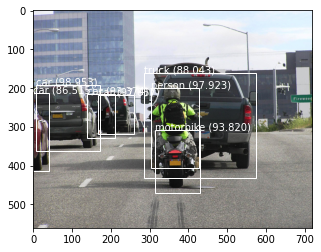

In [ ]:

anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]  



class_threshold = 0.6
boxes = list()
for i in range(len(yhat)):
	
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
    

correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)


do_nms(boxes, 0.4)  


labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck",
	"boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
	"bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe",
	"backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard",
	"sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard",
	"tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
	"apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake",
	"chair", "sofa", "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse",
	"remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator",
	"book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]


v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)



for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

draw_boxes(photo_filename, v_boxes, v_labels, v_scores)

#**Part IV**
#**Section B**
#**Yolo Algorithm**
##**Here, We are using the defined Yolo model to detect objects.**

#**1. You need to unzip the yolo3 weights that I have put in the Google drive and put it in a new folder. I named it YL.**

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/Yolo-dataset/yolov3.zip','r') as zipObj:
  zipObj.extractall('drive/MyDrive/YL')

#**2.Import libraries**

In [ ]:
import numpy as  np
import cv2
from google.colab.patches import cv2_imshow

# **3. Read the image**

In [ ]:
img_to_detect = cv2.imread('/content/drive/MyDrive/YL/scene3.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]

# **4. We create a blob. Blob has the following parameters:**
#**A. The image to transform**
#**B. The scale factor (1/255 to scale the pixel values to [0..1])**
#**C. The size here is 416x416** 
#**D. The mean value (default=0)**
#**E. The option swapBR=True (since OpenCV uses BGR)**


In [ ]:
img_blob = cv2.dnn.blobFromImage(img_to_detect, 0.003922, (416, 416), swapRB=True, crop=False)

# **5. Coco classes.**

In [ ]:
class_labels = ["person","bicycle","car","motorcycle","airplane","bus","train","truck","boat",
                "trafficlight","firehydrant","stopsign","parkingmeter","bench","bird","cat",
                "dog","horse","sheep","cow","elephant","bear","zebra","giraffe","backpack",
                "umbrella","handbag","tie","suitcase","frisbee","skis","snowboard","sportsball",
                "kite","baseballbat","baseballglove","skateboard","surfboard","tennisracket",
                "bottle","wineglass","cup","fork","knife","spoon","bowl","banana","apple",
                "sandwich","orange","broccoli","carrot","hotdog","pizza","donut","cake","chair",
                "sofa","pottedplant","bed","diningtable","toilet","tvmonitor","laptop","mouse",
                "remote","keyboard","cellphone","microwave","oven","toaster","sink","refrigerator",
                "book","clock","vase","scissors","teddybear","hairdrier","toothbrush"]

# **6. Our class colors**

In [ ]:
class_colors = ["0,255,0","0,0,255","255,0,0","255,255,0","0,255,255"]
class_colors = [np.array(every_color.split(",")).astype("int") for every_color in class_colors]
class_colors = np.array(class_colors)
class_colors = np.tile(class_colors,(16,1))

# **7.Load the Yolo network model and obtain the detection layers by forwarding through till the output layer**

In [ ]:
yolo_model = cv2.dnn.readNetFromDarknet('/content/drive/MyDrive/YL/yolov3.cfg', '/content/drive/MyDrive/YL/yolov3.weights')

In [ ]:
yolo_layers = yolo_model.getLayerNames()
yolo_output_layer = [yolo_layers[yolo_layer[0] - 1] for yolo_layer in yolo_model.getUnconnectedOutLayers()]


yolo_model.setInput(img_blob)

obj_detection_layers = yolo_model.forward(yolo_output_layer)

# **8. We loop over the detections, get the predicted label and obtain the bounding box coordinates for the actual image from resized image size. Then we convert the color numpy array as a list. Finally, we print the prediction and draw rectangles and text in the image.**

In [ ]:
for object_detection_layer in obj_detection_layers:
	
    for object_detection in object_detection_layer:
        
        
        
        all_scores = object_detection[5:]
        predicted_class_id = np.argmax(all_scores)
        prediction_confidence = all_scores[predicted_class_id]

        if prediction_confidence > 0.80:
            
            predicted_class_label = class_labels[predicted_class_id]
            
            bounding_box = object_detection[0:4] * np.array([img_width, img_height, img_width, img_height])
            (box_center_x_pt, box_center_y_pt, box_width, box_height) = bounding_box.astype("int")
            start_x_pt = int(box_center_x_pt - (box_width / 2))
            start_y_pt = int(box_center_y_pt - (box_height / 2))
            end_x_pt = start_x_pt + box_width
            end_y_pt = start_y_pt + box_height

            box_color = class_colors[predicted_class_id]
            
            
            box_color = [int(c) for c in box_color]
            
            
            predicted_class_label = "{}: {:.2f}%".format(predicted_class_label, prediction_confidence * 100)
            print("predicted object {}".format(predicted_class_label))
            
            
            cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), box_color, 1)
            cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, box_color, 1)
            

predicted object bus: 92.59%
predicted object trafficlight: 95.58%
predicted object bus: 97.56%
predicted object car: 99.75%
predicted object car: 99.91%
predicted object person: 95.74%
predicted object person: 98.84%
predicted object person: 99.81%
predicted object car: 89.21%
predicted object bicycle: 98.06%
predicted object bicycle: 99.80%
predicted object trafficlight: 88.06%
predicted object car: 98.96%
predicted object car: 87.65%


# **9. We detect objects**

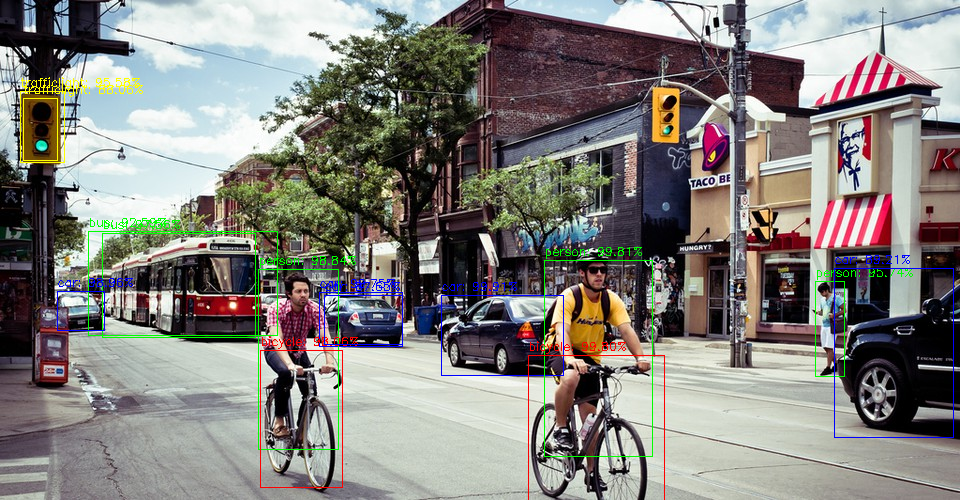

In [ ]:
cv2_imshow(img_to_detect)

#**References:** 
#**[1].Advanced Deep Learning with Python, Ivan Vasilev, 2019.**
#**[2]. Hands-On Transfer Learning with Python, Dipanjan Sarkar, Raghav Bali, and Tamoghna Ghosh-2018.**
#**[3]. Practical Convolutional Neural Networks, Mohit Sewak, Md. Rezaul Karim, Pradeep Pujari,2018.**
#**[4].Deep Learning for Computer Vision, Rajalingappaa Shanmugamani,2018.**
#**[5]. Modern Computer Vision with PyTorch V Kishore Ayyadevara, Yeshwanth Reddy,2020.**
#**[6]. Mastering Computer Vision with TensorFlow 2. x, Krishnendu Kar, 2020.**
#**[7].Computer Vision: You Only Look Once (YOLO) Custom Object Detection with Colab GPU, Abhilash Nelson, 2020.**
#**[8]. Github codes**
#**[9]. Kaggle codes and images.**
